In [1]:
'''
【课程3.4.2】  PCA主成分分析的python实现方法

最广泛无监督算法 + 基础的降维算法
通过线性变换将原始数据变换为一组各维度线性无关的表示，用于提取数据的主要特征分量 → 高维数据的降维

二维数据降维 / 多维数据降维 

'''

'\n【课程3.4.2】  PCA主成分分析的python实现方法\n\n最广泛无监督算法 + 基础的降维算法\n通过线性变换将原始数据变换为一组各维度线性无关的表示，用于提取数据的主要特征分量 → 高维数据的降维\n\n二维数据降维 / 多维数据降维 \n\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

         x1        x2
0  1.052537  0.667767
1  0.238624  0.135240
2  0.587999  0.490366
3  0.355460  0.351933
4  0.708370  0.592345
(200, 2)


(0.0, 2.0, 0.0, 1.6000000000000001)

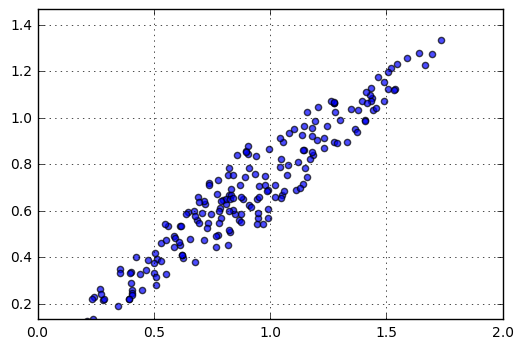

In [19]:
# 二维数据降维
# 数据创建
rng = np.random.RandomState(8)
data = np.dot(rng.rand(2,2),rng.rand(2,200)).T
df = pd.DataFrame({'x1':data[:,0],
                  'x2':data[:,1]})
print(df.head())
print(df.shape)
plt.scatter(df['x1'],df['x2'],marker='o',alpha = 0.7)
plt.grid()
plt.axis('equal')

[ 0.21020614]
[[-0.79207584 -0.6104227 ]]
1
[ 0.97982309]
orignal shape (200, 2)
transformed shape (200, 1)


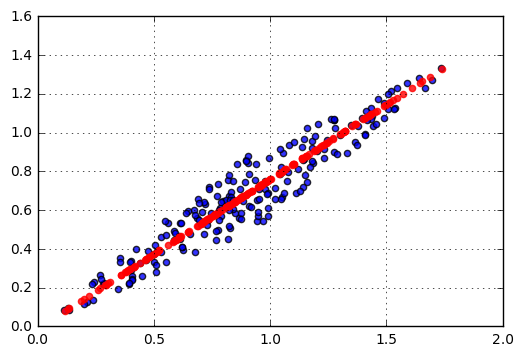

In [30]:
# 二维数据降维
# 构建模型，分析主成分


from sklearn.decomposition import PCA  
# 加载主成分分析模块PCA

pca = PCA(n_components = 1)  # n_components = 1 → 降为1维
pca.fit(df)  # 构建模型
# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)  
# n_components:  PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
# copy: True或者False，默认为True → 表示是否在运行算法时，将原始训练数据复制一份
# fit(X,y=None) → 调用fit方法的对象本身。比如pca.fit(X)，表示用X对pca这个对象进行训练


print(pca.explained_variance_)  #输出特征值
print(pca.components_) #输出特征向量
print(pca.n_components_)  #输出成分的个数
print(pca.explained_variance_ratio_)
# components_：返回具有最大方差的成分。
# explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。
# n_components_：返回所保留的成分个数n。

# 这里是shape(200,2)降为shape(200,1)，只有1个特征值，对应2个特征向量
# 降维后主成分 A1 = 0.7788006 * X1 + 0.62727158 * X2


x_pca = pca.transform(df)  #数据转换
x_new = pca.inverse_transform(x_pca) #将降维后的数据转换为原始数据格式
print('orignal shape',df.shape)
print('transformed shape',x_pca.shape)
# 主成分分析，生成新的向量x_pca
# fit_transform(X) → 用X来训练PCA模型，同时返回降维后的数据，这里x_pca就是降维后的数据
# inverse_transform() → 将降维后的数据转换成原始数据

plt.scatter(df['x1'],df['x2'],alpha = 0.8,marker = 'o')
plt.scatter(x_new[:,0],x_new[:,1],alpha = 0.8,marker = 'o',color = 'r')
plt.grid()

In [36]:
# 多维数据降维 
# 加载数据

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
print('数据长度为：',len(digits['data']))
print('数据形状为:%i条',digits.data.shape)
print(digits.data[:2])

dict_keys(['images', 'target', 'target_names', 'DESCR', 'data'])
数据长度为： 1797
数据形状为:%i条 (1797, 64)
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]]


original shape: (1797, 64)
transformed shape: (1797, 10)
[ 178.90731578  163.62664073  141.70953623  101.04411456   69.47448269
   59.075632     51.85566624   43.99061301   40.28856291   36.99120196]
(10, 64)
            b     b_sum
0  178.907316  0.201708
1  163.626641  0.386187
2  141.709536  0.545956
3  101.044115  0.659878
4   69.474483  0.738206
5   59.075632  0.804810
6   51.855666  0.863275
7   43.990613  0.912872
8   40.288563  0.958295
9   36.991202  1.000000


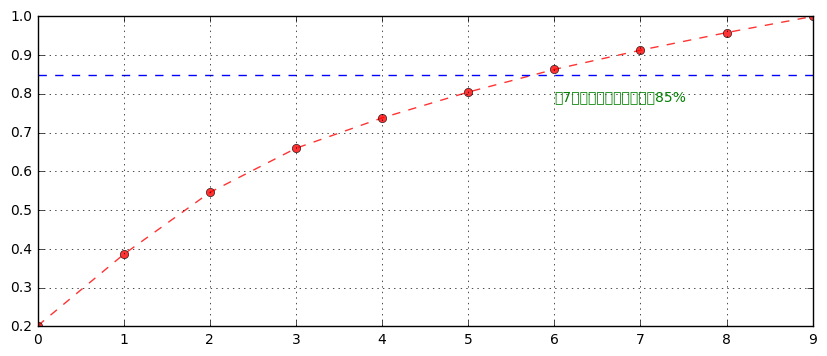

In [61]:
# 多维数据降维 
# 构建模型，分析主成分

pca = PCA(n_components=10)# 降为10纬

projected = pca.fit_transform(digits.data)
print('original shape:',digits.data.shape)
print('transformed shape:',projected.shape)
print(pca.explained_variance_)  # 输出特征值
print(pca.components_.shape)  # 输出特征向量形状
#print(projected)  # 输出解析后数据
# 降维后，得到2个成分，每个成分有64个特征向量
c_s = pd.DataFrame({'b':pca.explained_variance_,
                   'b_sum':pca.explained_variance_.cumsum()/pca.explained_variance_.sum()})
print(c_s)
c_s['b_sum'].plot(style = '--ro',grid = True,alpha=0.8,figsize = (10,4))
plt.axhline(0.85,linestyle = '--',hold = None)
plt.text(6,c_s['b_sum'].iloc[6]-0.08,'第7个成分累计贡献率超过85%',color = 'g')


In [2]:
'''
【课程3.4.3】  K-means聚类的python实现方法

最常用的机器学习聚类算法，且为典型的基于距离的聚类算法
K均值： 基于原型的、划分的距离技术，它试图发现用户指定个数(K)的簇
以欧式距离作为相似度测度

'''

'\n【课程3.4.3】  K-means聚类的python实现方法\n\n最常用的机器学习聚类算法，且为典型的基于距离的聚类算法\nK均值： 基于原型的、划分的距离技术，它试图发现用户指定个数(K)的簇\n以欧式距离作为相似度测度\n\n'

[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]]
[1 3 0 3 1]


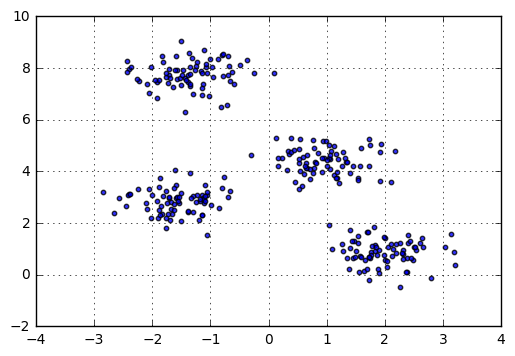

In [8]:
# 创建数据

from  sklearn.datasets.samples_generator import make_blobs
# make_bllobs 聚类数据生成器

x,y_true = make_blobs(n_samples = 300, #生成300条数据
                     centers = 4,  #四类数据
                     cluster_std = 0.5, #方差一致
                     random_state = 0)
print(x[:5])
print(y_true[:5])
# n_samples → 待生成的样本的总数。
# n_features → 每个样本的特征数。
# centers → 类别数
# cluster_std → 每个类别的方差，如多类数据不同方差，可设置为[1.0,3.0]（这里针对2类数据）
# random_state → 随机数种子
# x → 生成数据值， y → 生成数据对应的类别标签

plt.scatter(x[:,0],x[:,1],s = 10,alpha = 0.8)
plt.grid()

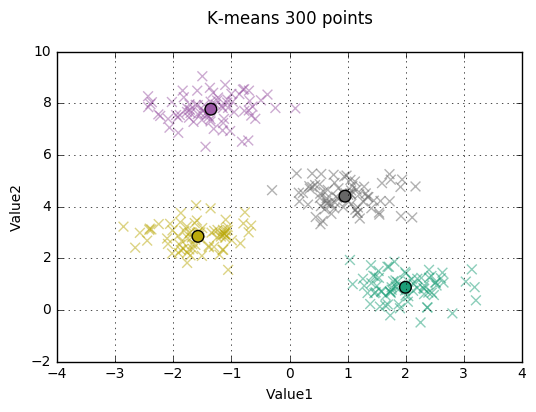

In [11]:
#构建K均值模型

from sklearn.cluster import KMeans
#倒入模块

kmeans = KMeans(n_clusters = 4)  #这里为四簇
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
centroids = kmeans.cluster_centers_
# 构建模型，并预测出样本的类别y_kmeans
# kmeans.cluster_centers_：得到不同簇的中心点

plt.scatter(x[:,0],x[:,1],c = y_kmeans,cmap = 'Dark2',s= 50,alpha = 0.5,marker= 'x')
plt.scatter(centroids[:,0],centroids[:,1],c = [0,1,2,3],cmap = 'Dark2',s =70,marker='o')
plt.grid()
plt.title('K-means 300 points\n')
plt.xlabel('Value1')
plt.ylabel('Value2')
